<a href="https://colab.research.google.com/github/anushadsouza19/INSE-6220/blob/main/PCA_on_Raisins_Segregation_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis on Raisins Segregation using Machine Learning**

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
pip install pycaret[analysis]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.9/286.9 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.8 MB/s eta 0:00:00
  Preparing meta

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://github.com/anushadsouza19/INSE-6220/blob/main/Raisin_Dataset.csv')

df.head(25)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   87524       442.246011       253.291155      0.819738       90546   
1   75166       406.690687       243.032436      0.801805       78789   
2   90856       442.267048       266.328318      0.798354       93717   
3   45928       286.540559       208.760042      0.684989       47336   
4   79408       352.190770       290.827533      0.564011       81463   
5   49242       318.125407       200.122120      0.777351       51368   
6   42492       310.146072       176.131449      0.823099       43904   
7   60952       332.455472       235.429835      0.706058       62329   
8   42256       323.189607       172.575926      0.845499       44743   
9   64380       366.964842       227.771615      0.784056       66125   
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   
20  69726       354.176912       252.529208      0.701161       71849   
21  57346       330.478438       222.443748      0.739555       59365   
22  82028       397.114976       268.333773      0.737169       84427   
23  61251       301.507790       273.659941      0.419754       64732   
24  96277       447.134523       275.216154      0.788128       97865   

      Extent  Perimeter  Class  
0   0.758651   1184.040      0  
1   0.684130   1121.786      0  
2   0.637613   1208.575      0  
3   0.699599    844.162      0  
4   0.792772   1073.251      0  
5   0.658456    881.836      0  
6   0.665894    823.796      0  
7   0.743598    933.366      0  
8   0.698031    849.728      0  
9   0.664376    981.544      0  
10  0.674236   1176.305      0  
11  0.697068    818.873      0  
12  0.690856    803.748      0  
13  0.772322   1042.770      0  
14  0.680182   1084.729      0  
15  0.681551    751.413      0  
16  0.756773   1028.445      0  
17  0.694998    981.509      0  
18  0.713838    814.680      0  
19  0.728075   1061.321      0  
20  0.734399   1035.501      0  
21  0.723609    928.272      0  
22  0.686375   1106.355      0  
23  0.643596    971.769      0  
24  0.704057   1181.921      0

In [ ]:
len(df.index)

899

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             899 non-null    int64  
 1   MajorAxisLength  899 non-null    float64
 2   MinorAxisLength  899 non-null    float64
 3   Eccentricity     899 non-null    float64
 4   ConvexArea       899 non-null    int64  
 5   Extent           899 non-null    float64
 6   Perimeter        899 non-null    float64
 7   Class            899 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.3 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

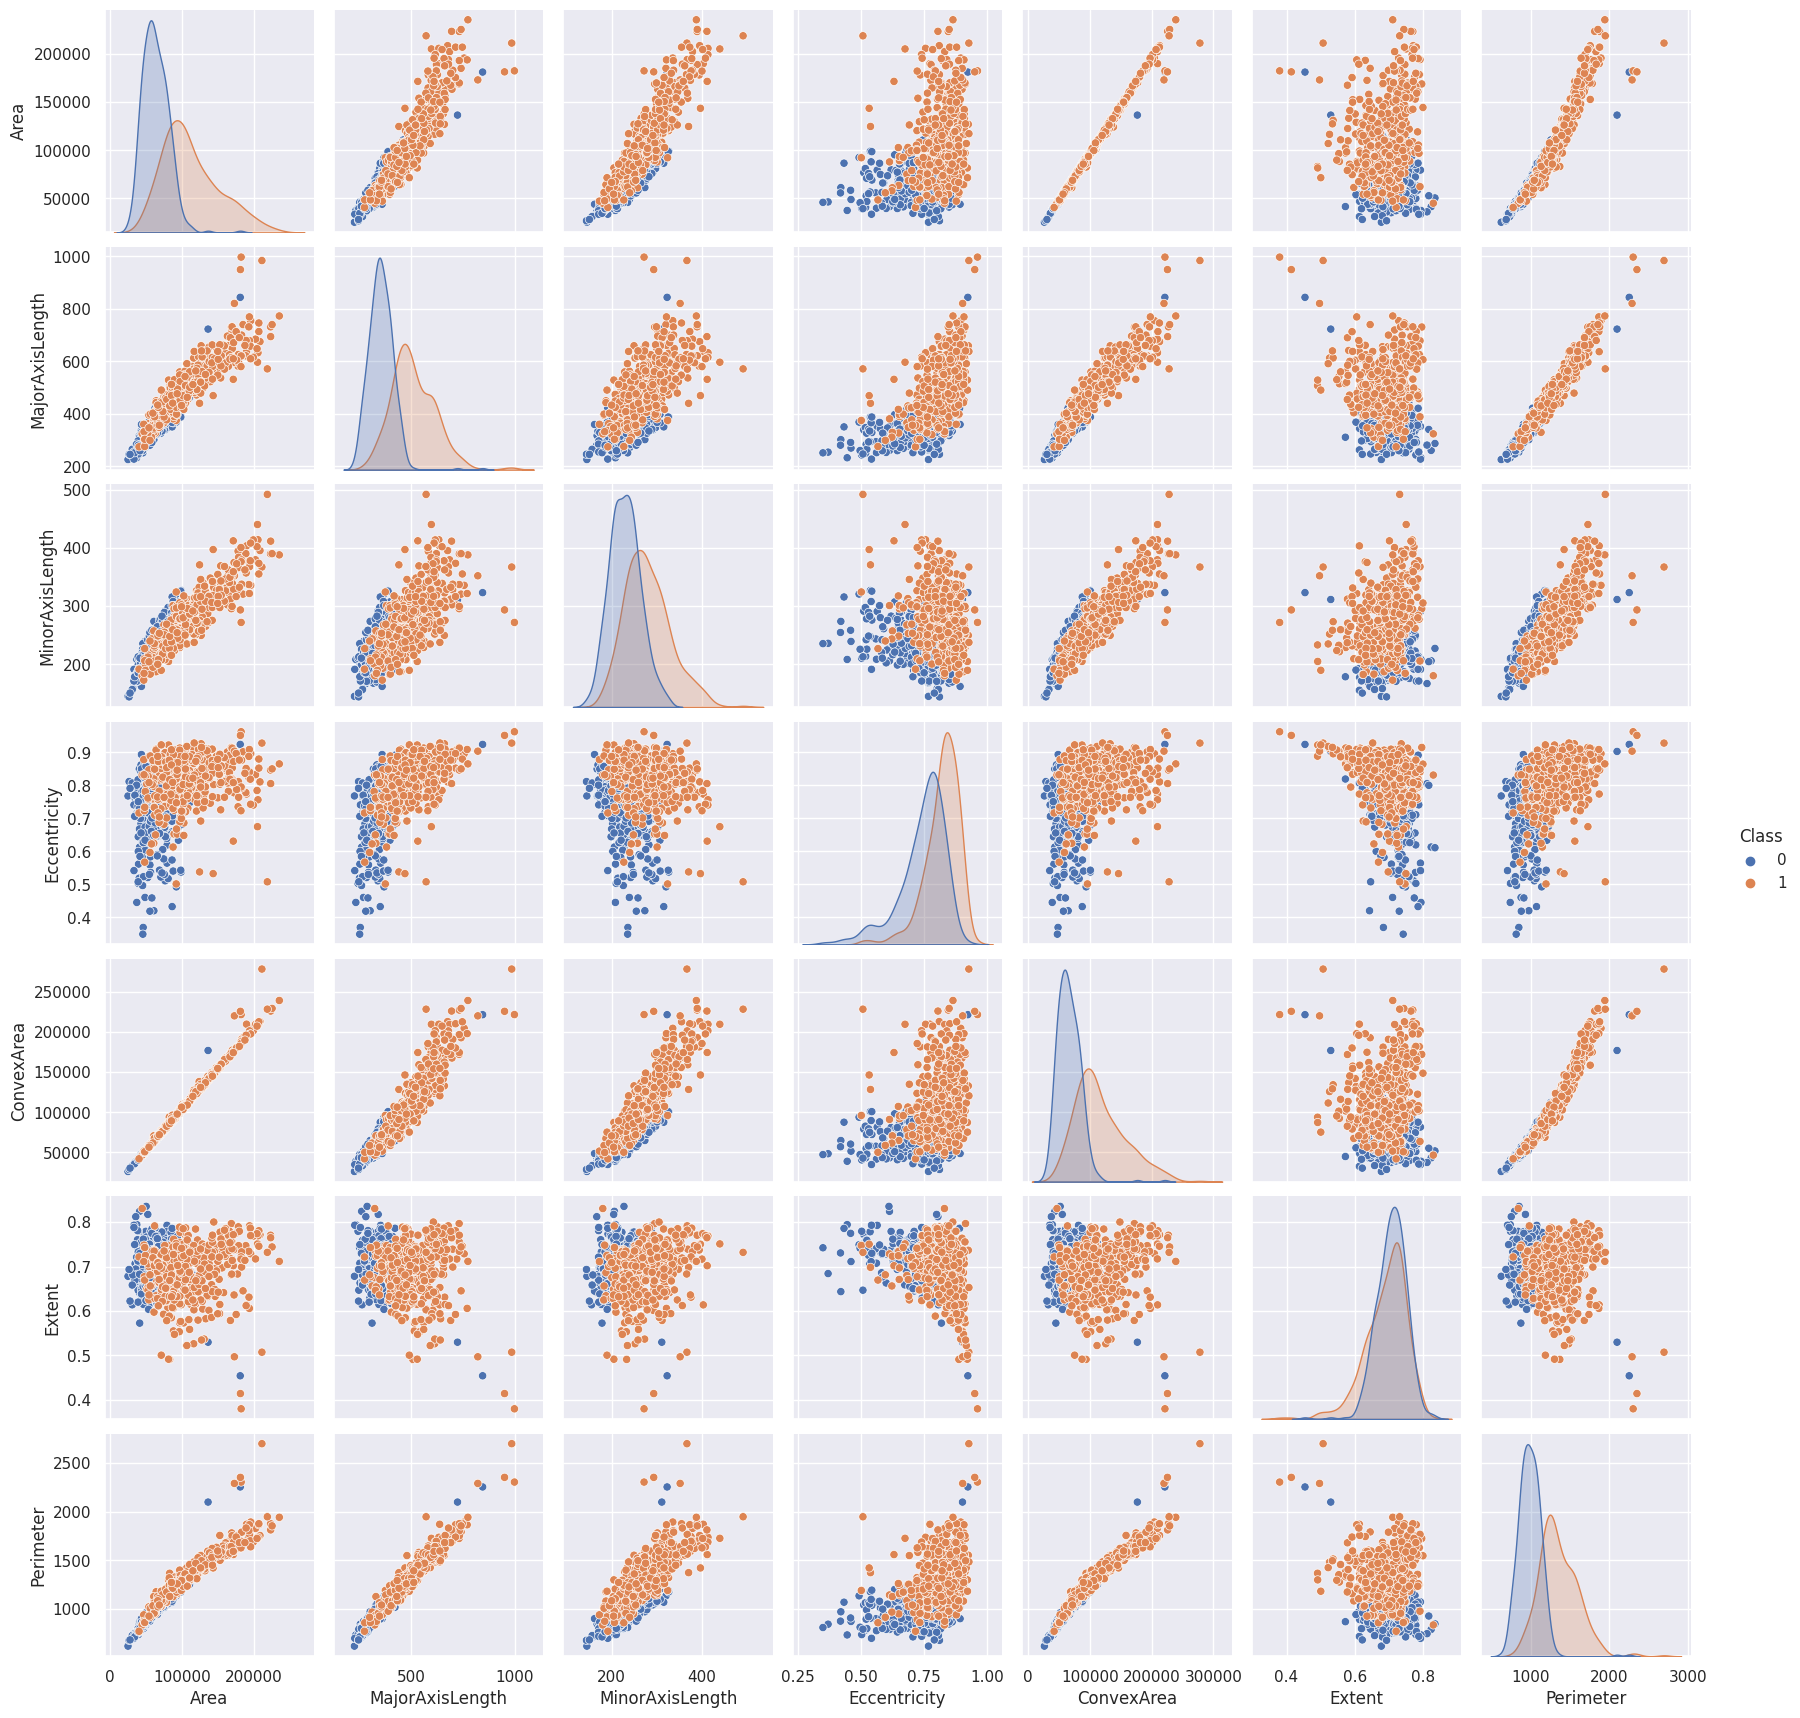

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

**Data Matrix**

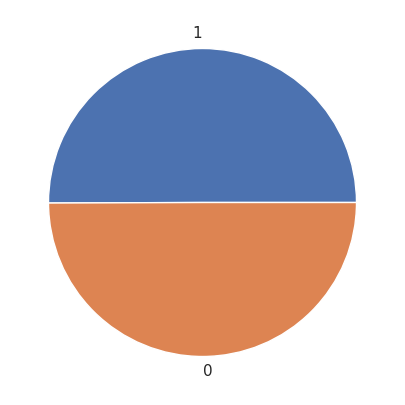

In [ ]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
X = df.drop(columns=['Class'])
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   
5  49242       318.125407       200.122120      0.777351       51368   
6  42492       310.146072       176.131449      0.823099       43904   
7  60952       332.455472       235.429835      0.706058       62329   
8  42256       323.189607       172.575926      0.845499       44743   
9  64380       366.964842       227.771615      0.784056       66125   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  
5  0.658456    881.836  
6  0.665894    823.796  
7  0.743598    933.366  
8  0.698031    849.728  
9  0.664376    981.544

In [ ]:
X.describe().transpose()

count          mean           std           min  \
Area             899.0  87820.409344  39020.761065  25387.000000   
MajorAxisLength  899.0    431.031035    116.060054    225.629541   
MinorAxisLength  899.0    254.464187     50.011563    143.710872   
Eccentricity     899.0      0.781762      0.090128      0.348730   
ConvexArea       899.0  91204.600667  40788.199568  26139.000000   
Extent           899.0      0.699420      0.053433      0.379856   
Perimeter        899.0   1166.079531    273.867535    619.074000   

                          25%           50%            75%            max  
Area             59326.000000  78921.000000  105036.500000  235047.000000  
MajorAxisLength    345.714549    407.939263     494.211068     997.291941  
MinorAxisLength    219.037000    247.838695     279.964239     492.275279  
Eccentricity         0.741863      0.798953       0.842683       0.962124  
ConvexArea       61507.500000  81689.000000  108455.500000  278217.000000  
Extent               0.670861      0.707308       0.734880       0.835455  
Perimeter          966.383500   1120.019000    1309.096500    2697.753000

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -0.007600         0.096685        -0.023468      0.421598   -0.016156   
1 -0.324480        -0.209839        -0.228709      0.222513   -0.304561   
2  0.077838         0.096866         0.237360      0.184195    0.061631   
3 -1.074190        -1.245656        -0.914380     -1.074322   -1.076121   
4 -0.215708        -0.679684         0.727503     -2.417360   -0.238967   
5 -0.989214        -0.973362        -1.087195     -0.048963   -0.977213   
6 -1.162295        -1.042152        -1.567164      0.458902   -1.160309   
7 -0.688950        -0.849822        -0.380811     -0.840432   -0.708334   
8 -1.168347        -0.929704        -1.638298      0.707578   -1.139728   
9 -0.601051        -0.552316        -0.534025      0.025465   -0.615216   

     Extent  Perimeter  
0  1.109133   0.065617  
1 -0.286319  -0.161823  
2 -1.157374   0.155254  
3  0.003363  -1.176104  
4  1.748076  -0.339143  
5 -0.767066  -1.038465  
6 -0.627799  -1.250510  
7  0.827267  -0.850203  
8 -0.026007  -1.155769  
9 -0.656222  -0.674188

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Area             899.0  1.896888e-16  1.000557 -1.600896 -0.730644 -0.228196   
MajorAxisLength  899.0 -1.264592e-16  1.000557 -1.770771 -0.735516 -0.199075   
MinorAxisLength  899.0 -2.529184e-16  1.000557 -2.215787 -0.708774 -0.132553   
Eccentricity     899.0 -7.587553e-16  1.000557 -4.807313 -0.442931  0.190854   
ConvexArea       899.0  0.000000e+00  1.000557 -1.596094 -0.728486 -0.233423   
Extent           899.0  9.484441e-17  1.000557 -5.984026 -0.534785  0.147706   
Perimeter        899.0 -1.264592e-16  1.000557 -1.998448 -0.729576 -0.168279   

                      75%       max  
Area             0.441449  3.775132  
MajorAxisLength  0.544677  4.881749  
MinorAxisLength  0.510167  4.757769  
Eccentricity     0.676318  2.002299  
ConvexArea       0.423174  4.587515  
Extent           0.664017  2.547334  
Perimeter        0.522503  5.595866

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

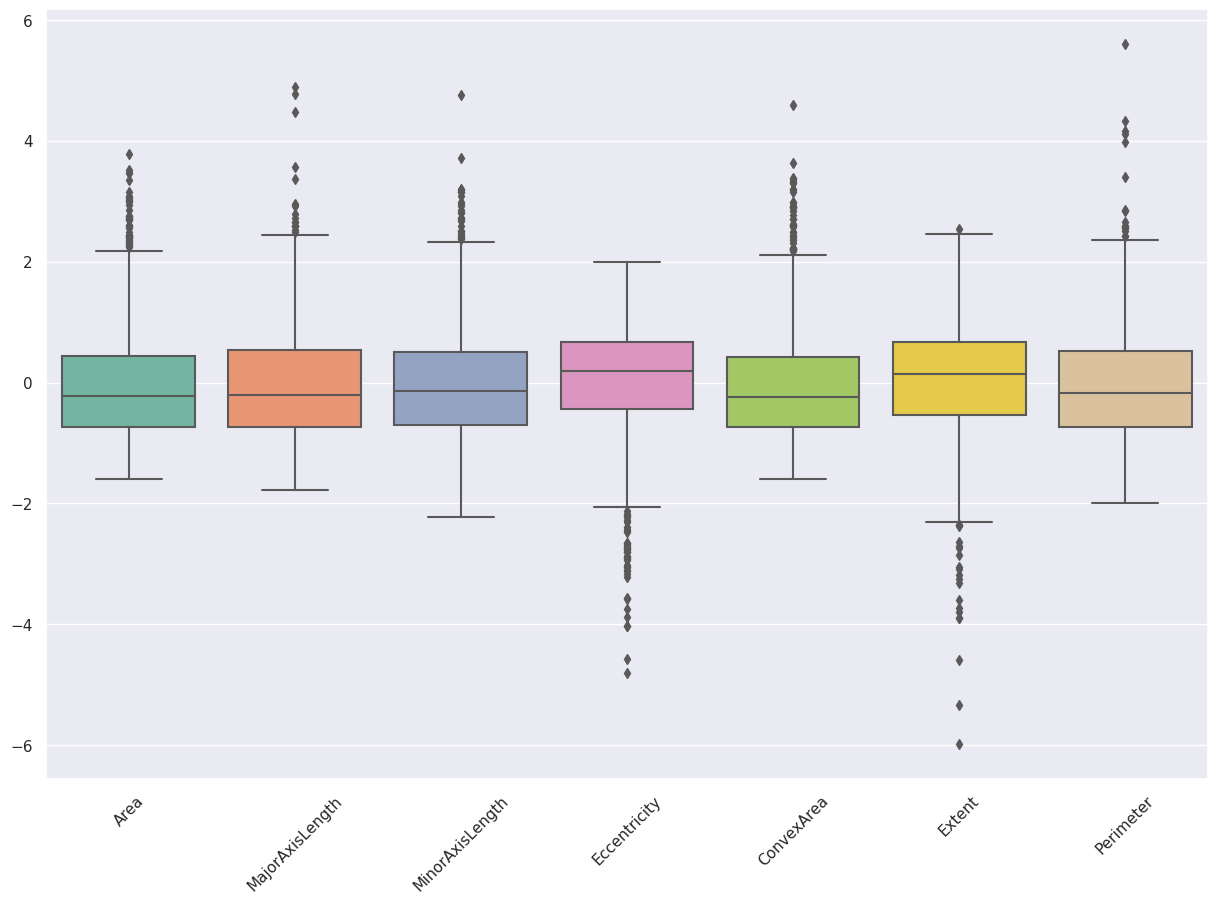

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


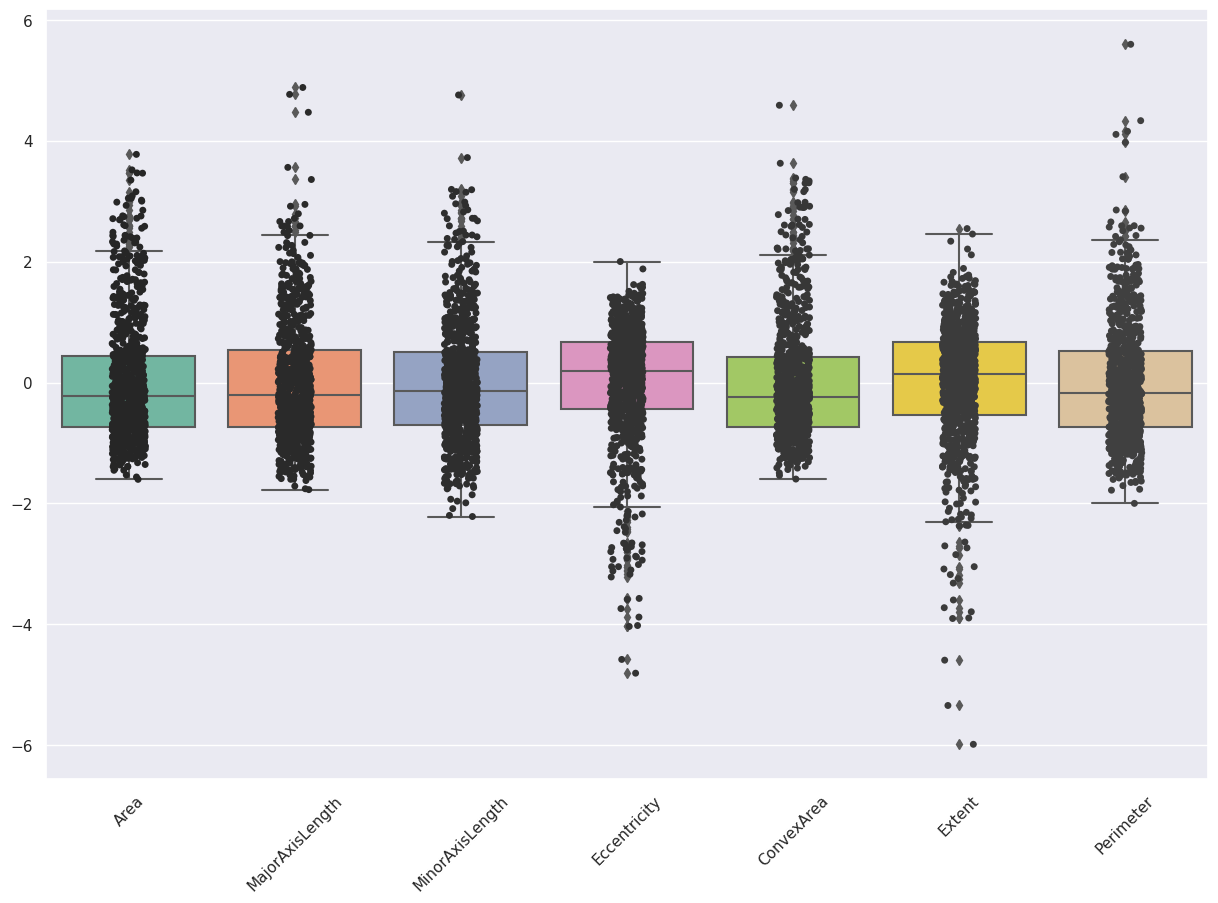

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

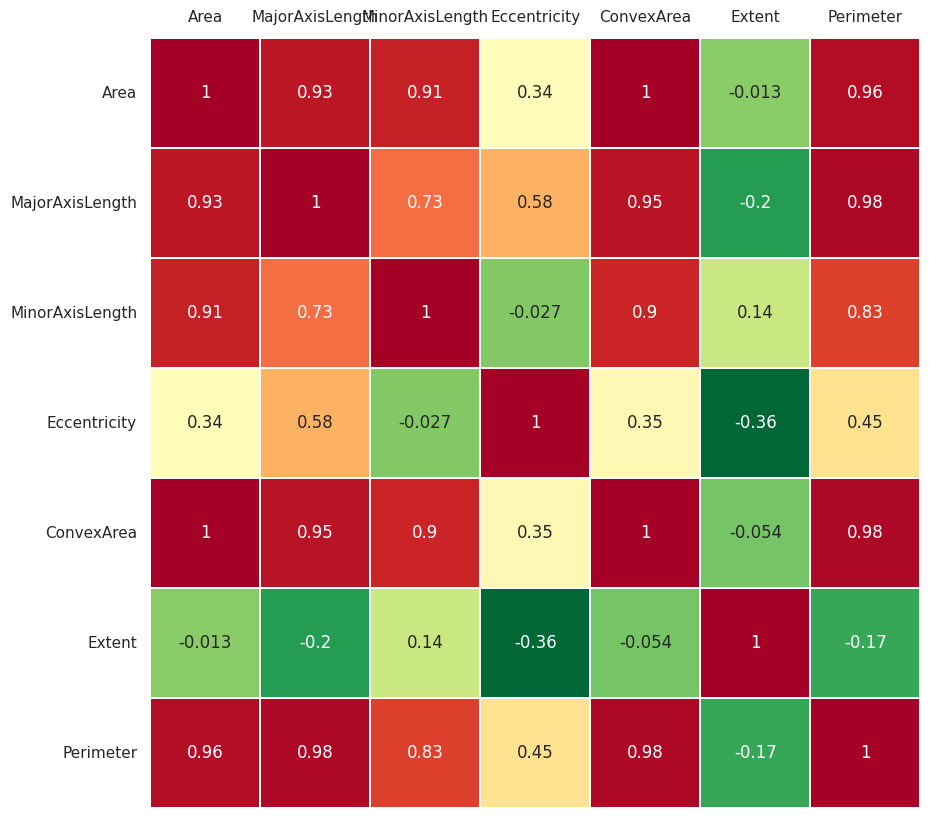

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

**Principal Component Analysis(PCA)**

Text(0, 0.5, '$Z_2$')

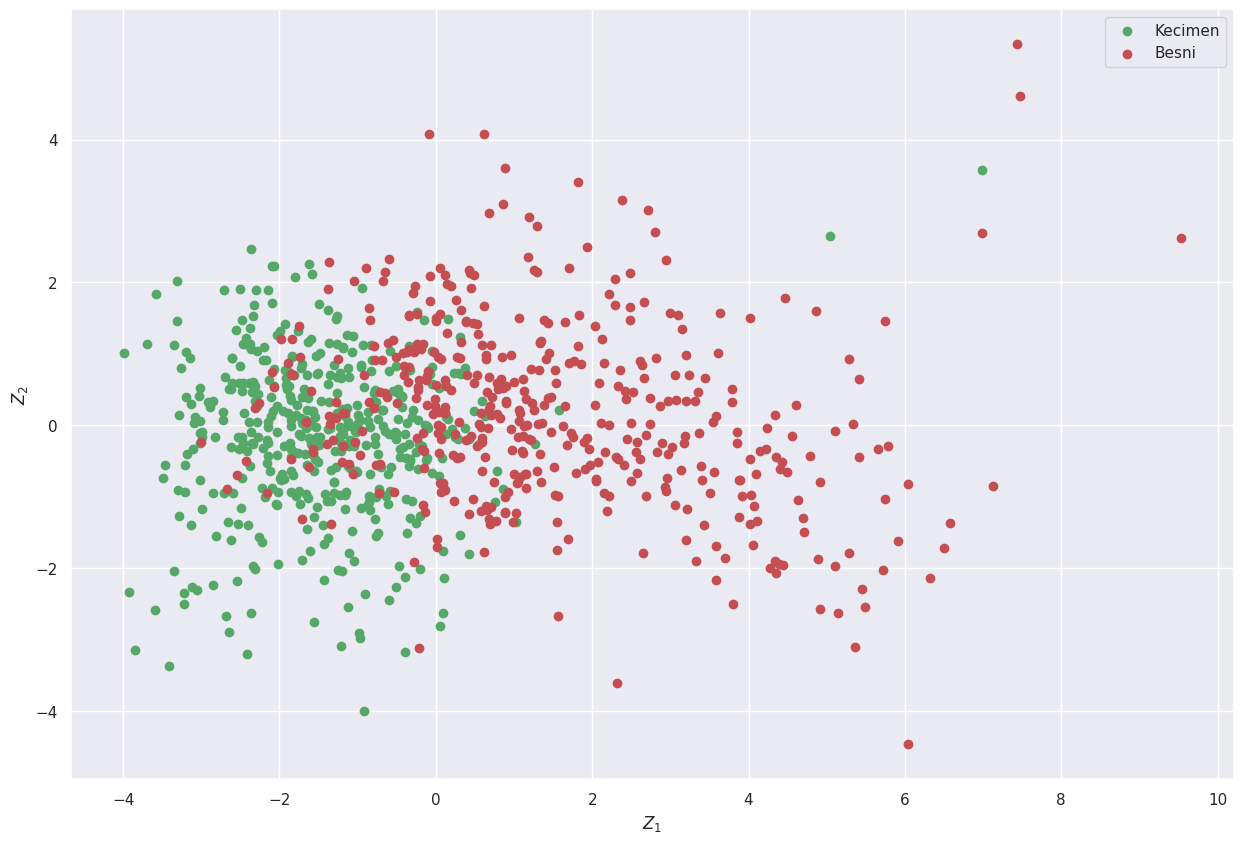

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# (Besni)->1,  (Kecimen)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Kecimen')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Besni')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 0.44826452, -0.11607313,  0.00575824, -0.1106089 , -0.61116926,
        -0.0995091 , -0.62441055],
       [ 0.44321651,  0.13669757, -0.10026427,  0.49504977,  0.087479  ,
        -0.68570828,  0.22780973],
       [ 0.38959152, -0.37436127,  0.23584591, -0.65646615,  0.38399681,
        -0.23906318,  0.1299855 ],
       [ 0.20291573,  0.61081534, -0.62892663, -0.42584324,  0.07443583,
         0.05370285,  0.02034622],
       [ 0.45091304, -0.08755649,  0.03688985,  0.05623692, -0.39215291,
         0.47148958,  0.639063  ],
       [-0.05594199, -0.66764793, -0.73171555,  0.10917713,  0.05695974,
         0.0232909 , -0.00160131],
       [ 0.45078779,  0.03433898,  0.04442304,  0.33958634,  0.55569506,
         0.48684906, -0.36400537]])

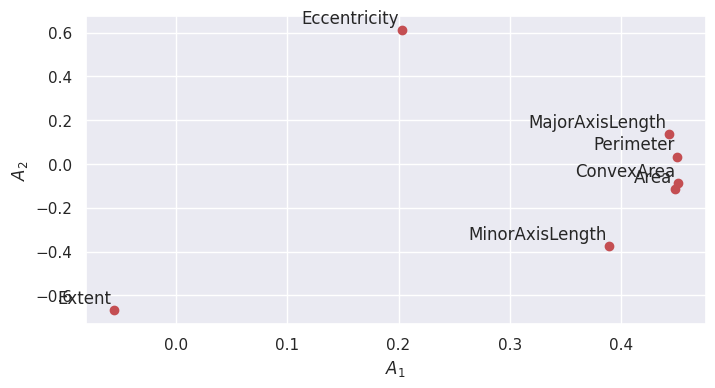

In [ ]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


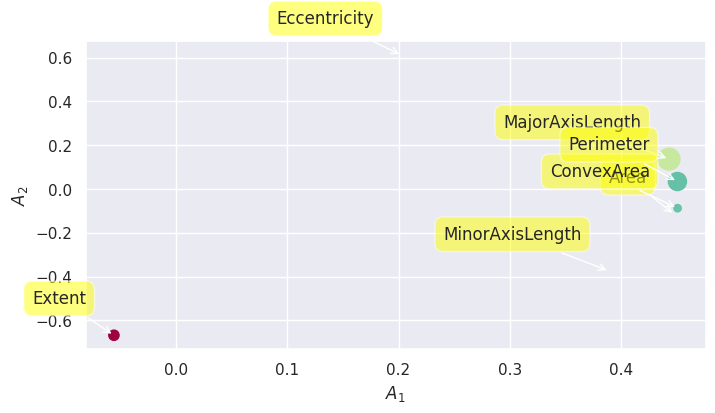

In [ ]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([4.83833087e+00, 1.45218657e+00, 6.31111521e-01, 5.68920522e-02,
       2.18290922e-02, 6.43325871e-03, 1.01173631e-03])

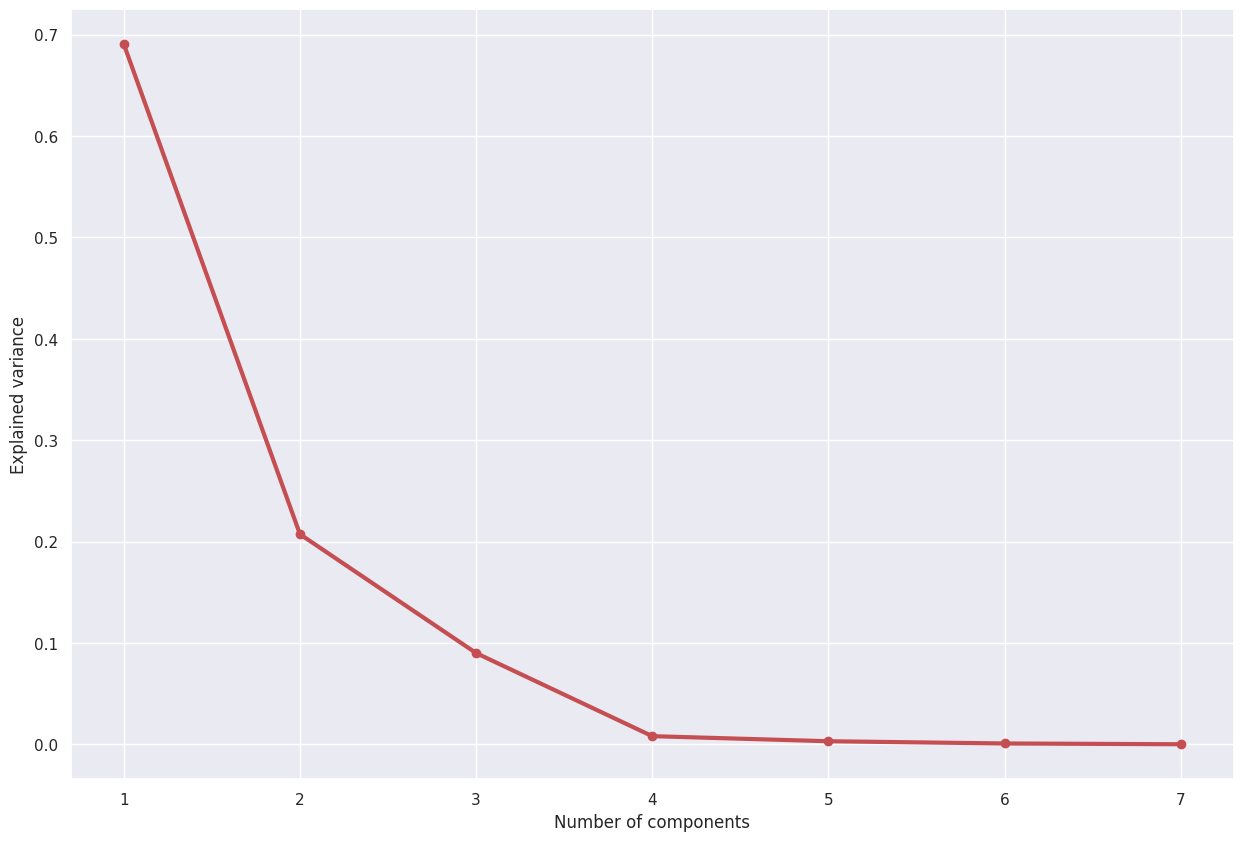

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

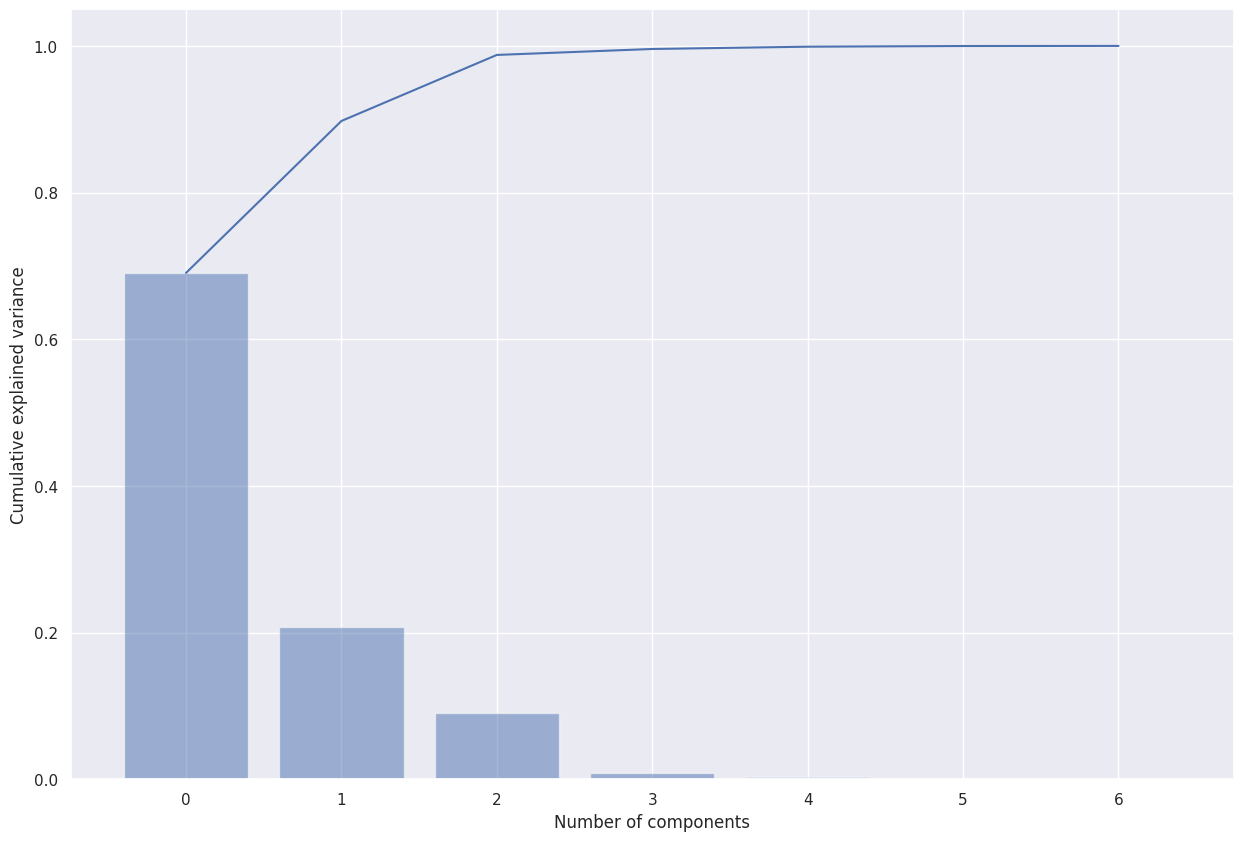

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-4.56439378e-01,  4.42782842e-01,  8.00510375e-01, -3.07907494e-01,
       -2.97460497e+00,  9.20892426e-01,  1.33724212e+00, -9.26487241e-01,
        1.13150652e+00,  6.78578882e-01,  1.04381695e+00,  5.86000706e-01,
       -1.58705771e-01, -3.09133478e+00,  2.14473097e-01,  8.04359536e-01,
        2.36847333e-01, -3.62170790e-02,  5.14970860e-01,  4.91166269e-01,
       -9.80893760e-01, -3.38041037e-01, -2.58836978e-01, -1.94169843e+00,
       -1.88739744e-01, -9.88544157e-01, -1.85218766e-01, -2.91682215e+00,
       -2.77090221e-01, -7.17021367e-01,  9.43654104e-01, -1.07096529e+00,
       -4.78953396e-01, -2.50223345e+00, -2.04441159e+00, -8.74534410e-01,
        2.11355308e+00, -1.01354430e-01, -1.60867248e+00, -2.14406012e+00,
       -6.42678726e-01, -9.51053548e-01, -3.17712880e+00,  1.57967229e+00,
        3.86197437e-01, -2.92595675e-01, -2.35010627e+00,  5.51457490e-01,
        1.35736175e-01,  1.35997333e+00,  2.12097284e-01,  1.91696477e+00,
        1.89200168e+00, -

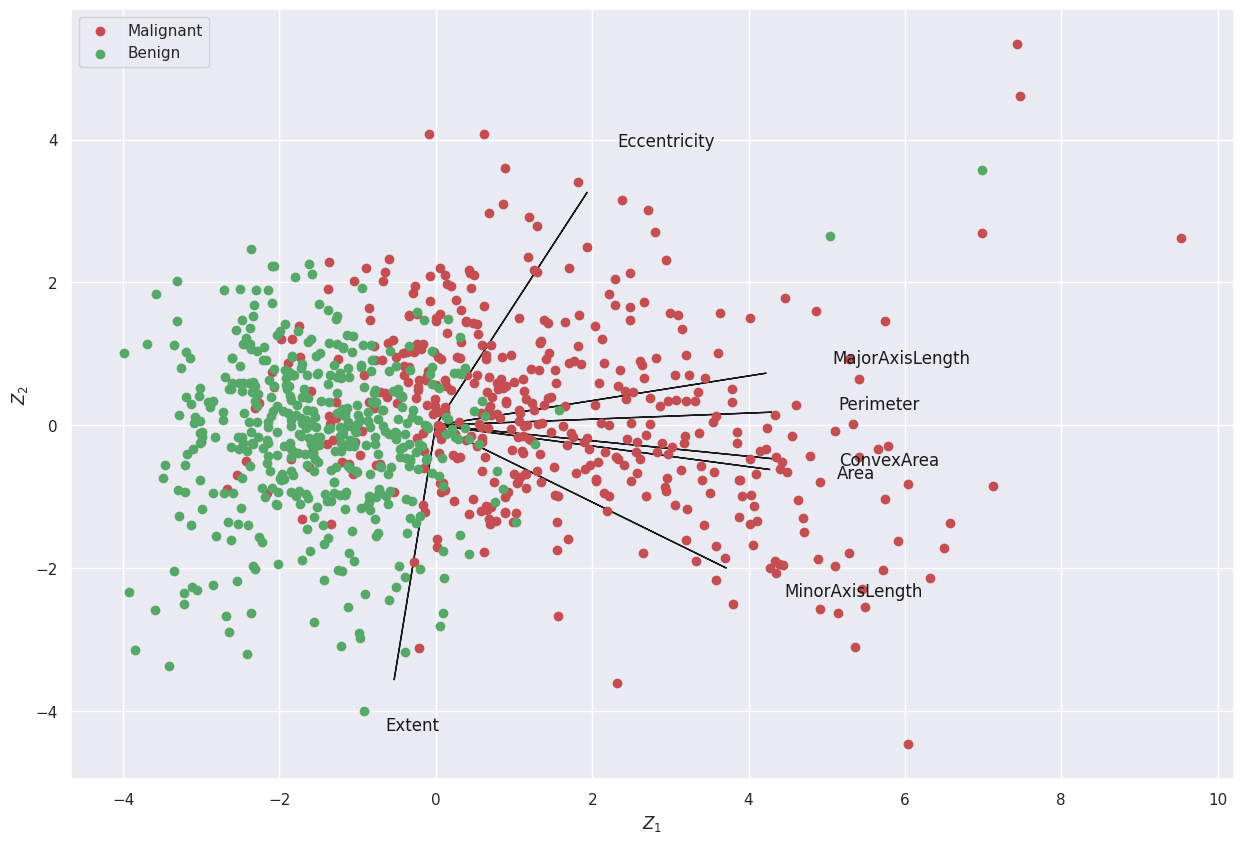

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

**Using PCA Library**

In [ ]:
pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3
0    0.076099 -0.456439 -1.089678
1   -0.476670  0.442783  0.016366
2    0.370196  0.800510  0.786910
3   -2.623447 -0.307907  0.484322
4   -0.963458 -2.974605  0.455851
..        ...       ...       ...
894 -0.116085  0.692620  0.129801
895  0.271729  0.952483  0.696722
896  0.680819 -1.311674  0.093125
897  0.646728  0.978016  0.091058
898  0.485956  2.107563 -0.193127

[899 rows x 3 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

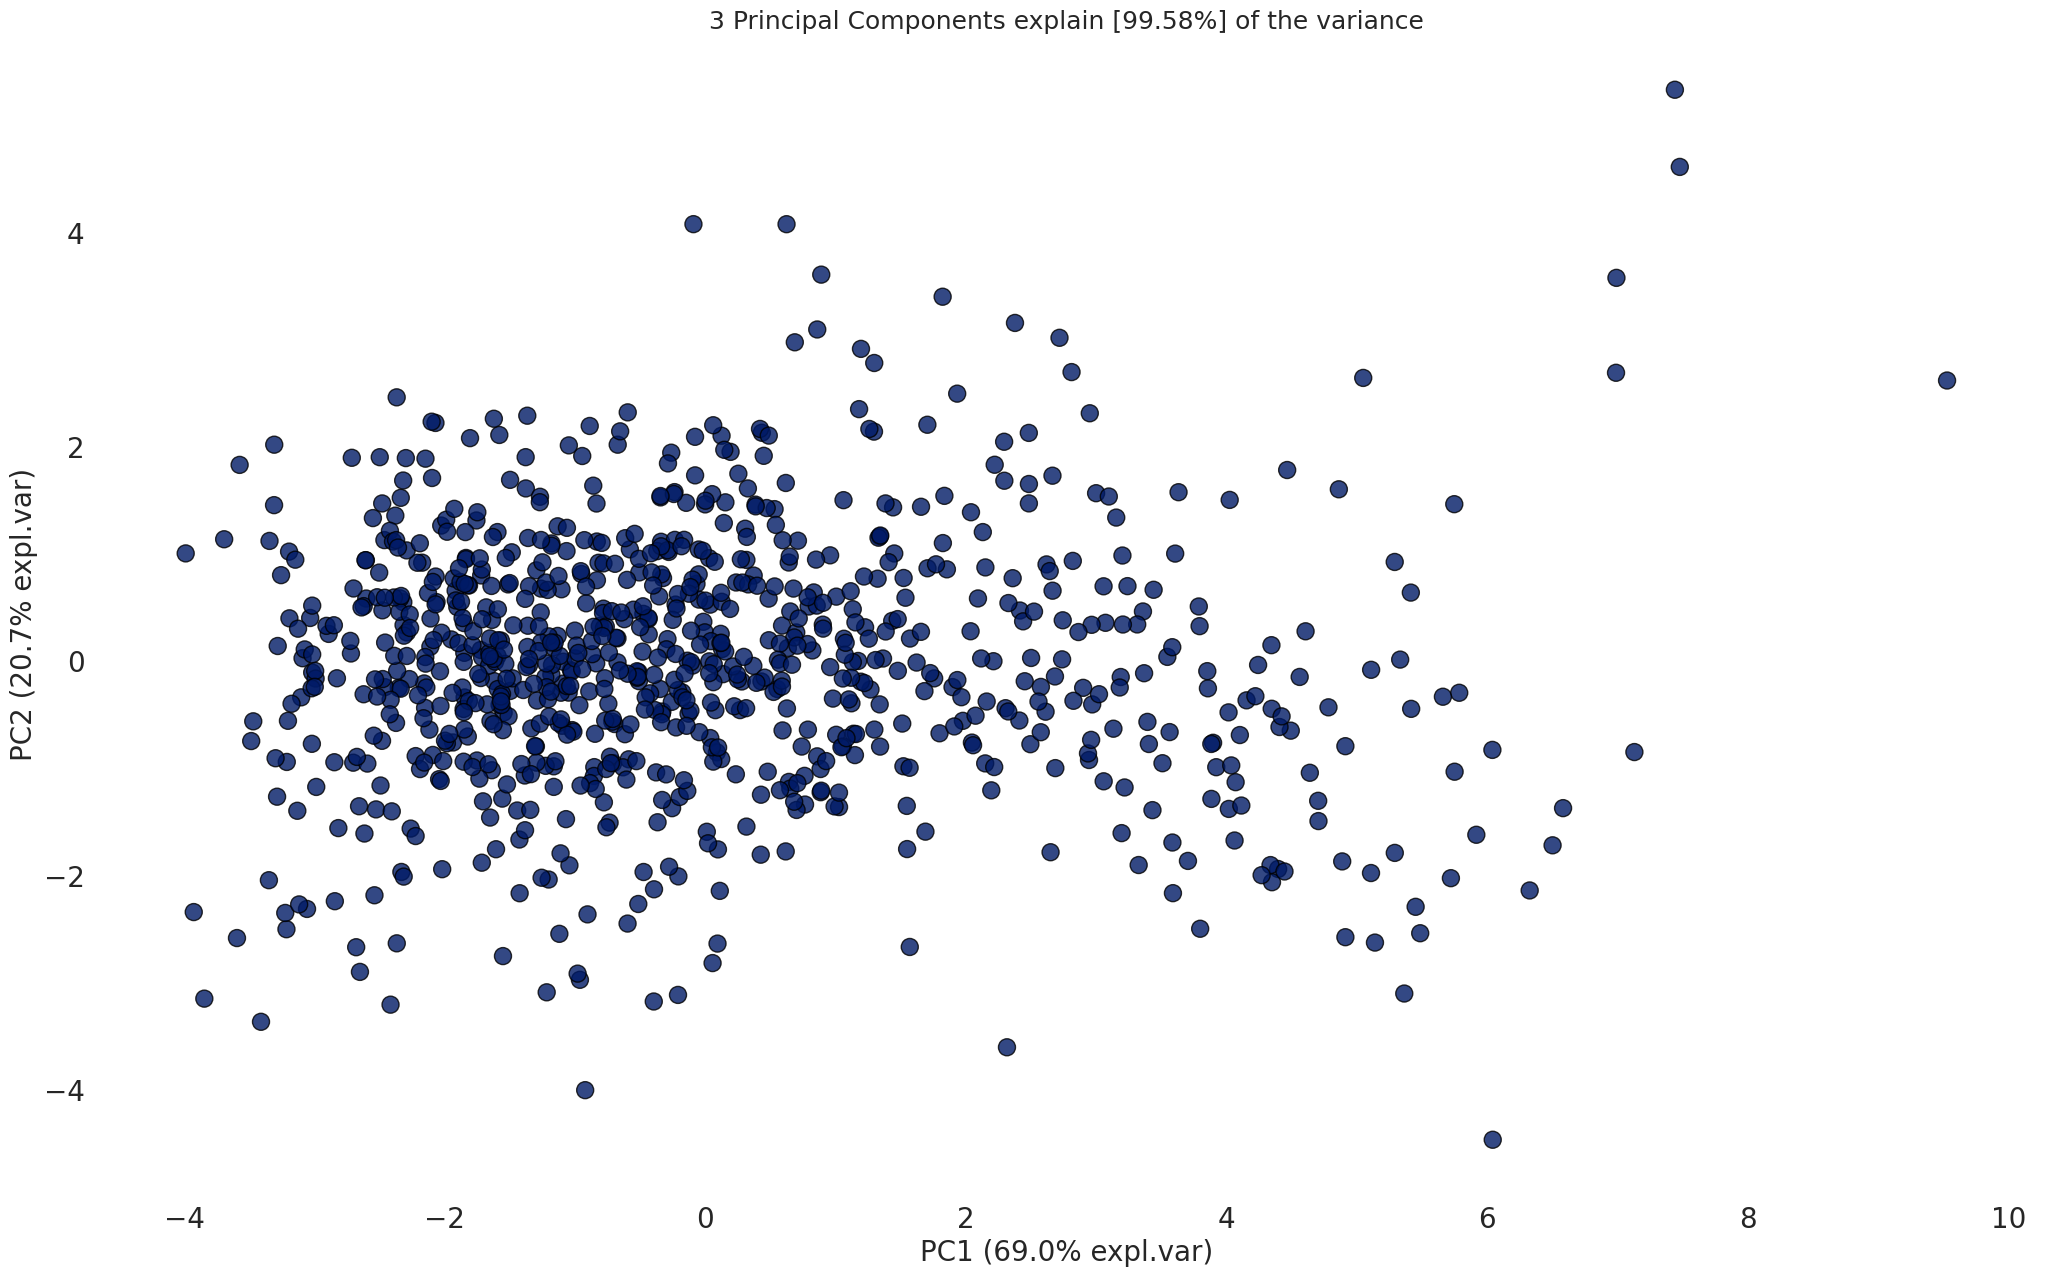

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

PC1       PC2       PC3
Area             0.448265 -0.116073  0.005758
MajorAxisLength  0.443217  0.136698 -0.100264
MinorAxisLength  0.389592 -0.374361  0.235846
Eccentricity     0.202916  0.610815 -0.628927
ConvexArea       0.450913 -0.087556  0.036890
Extent          -0.055942 -0.667648 -0.731716
Perimeter        0.450788  0.034339  0.044423

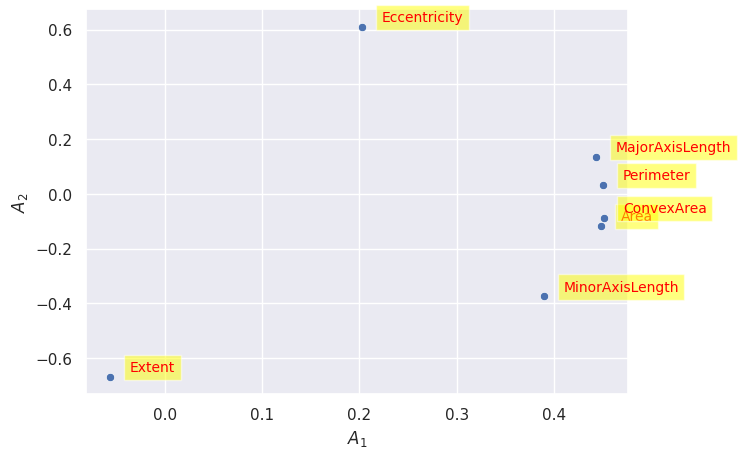

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

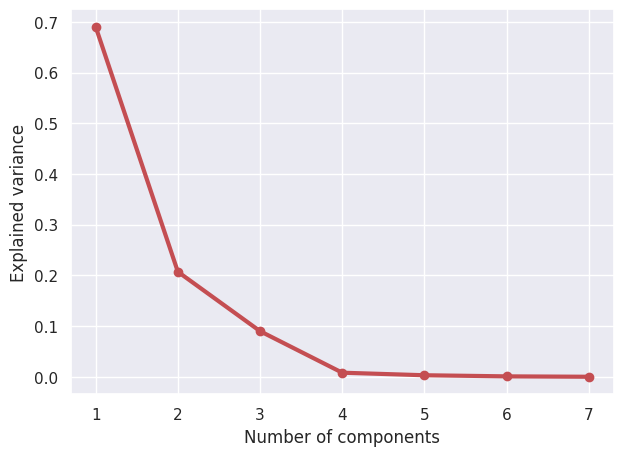

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

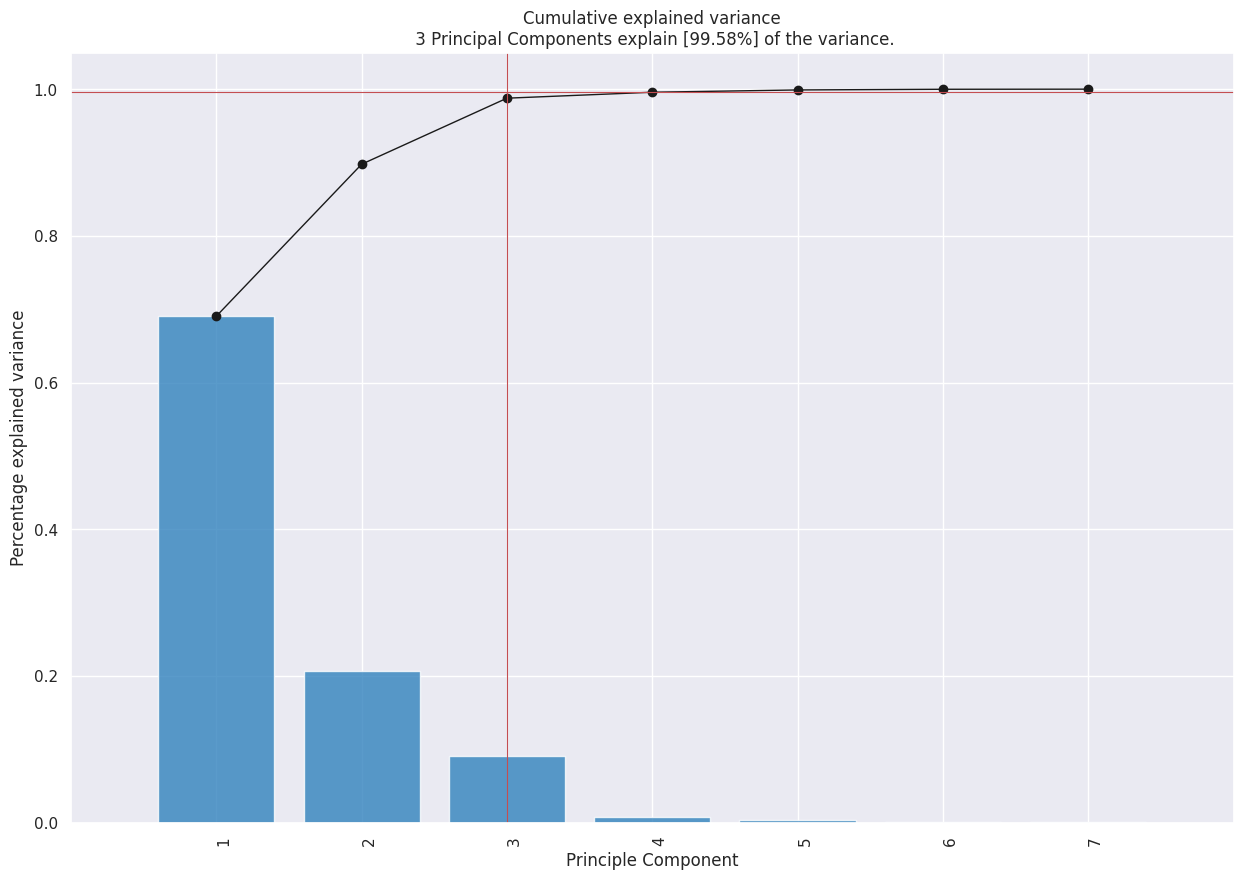

<Figure size 700x500 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


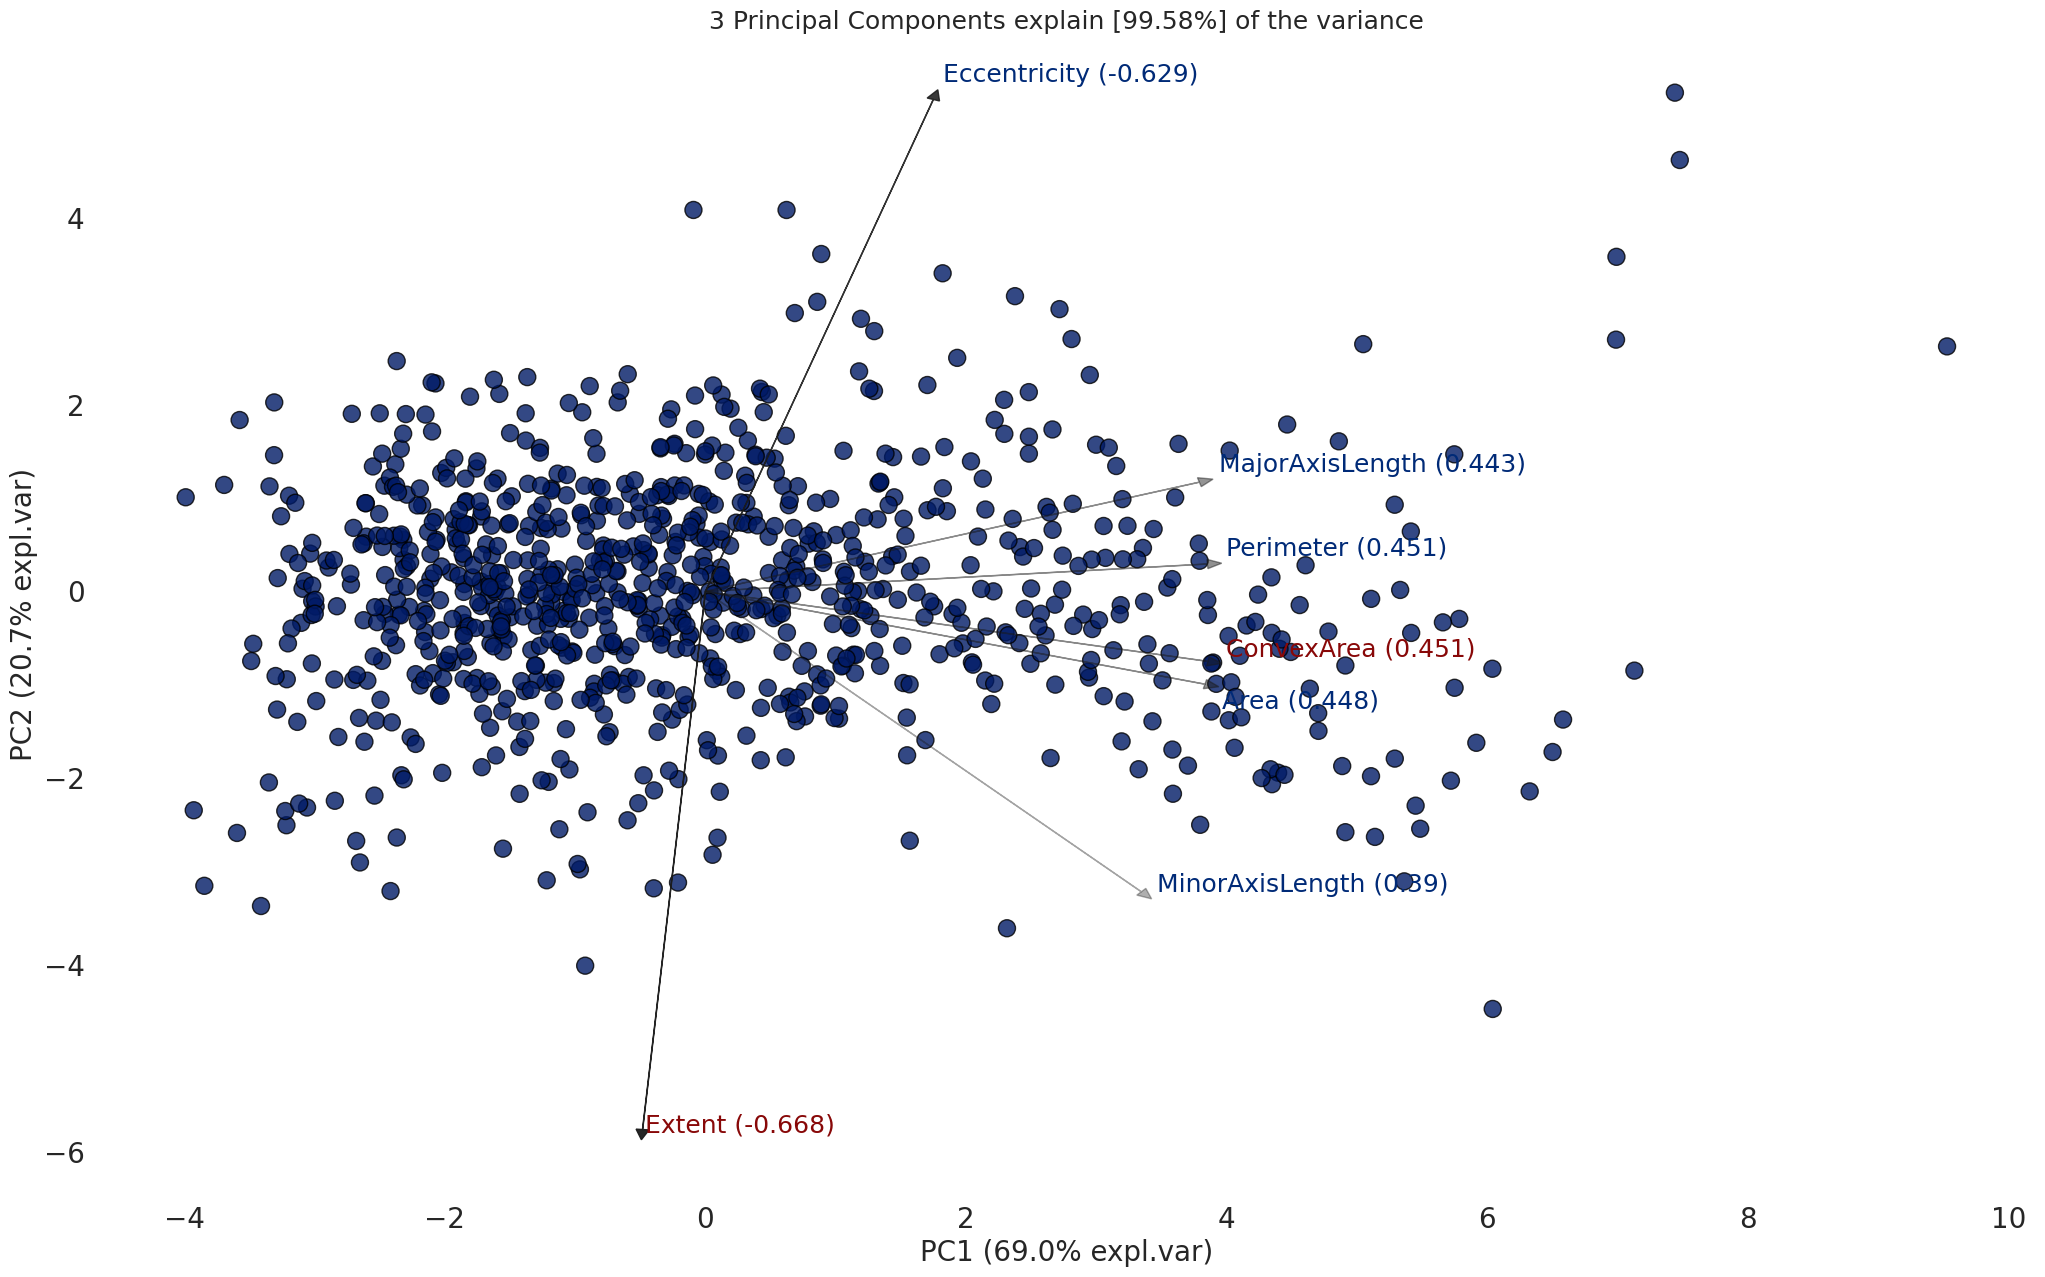

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


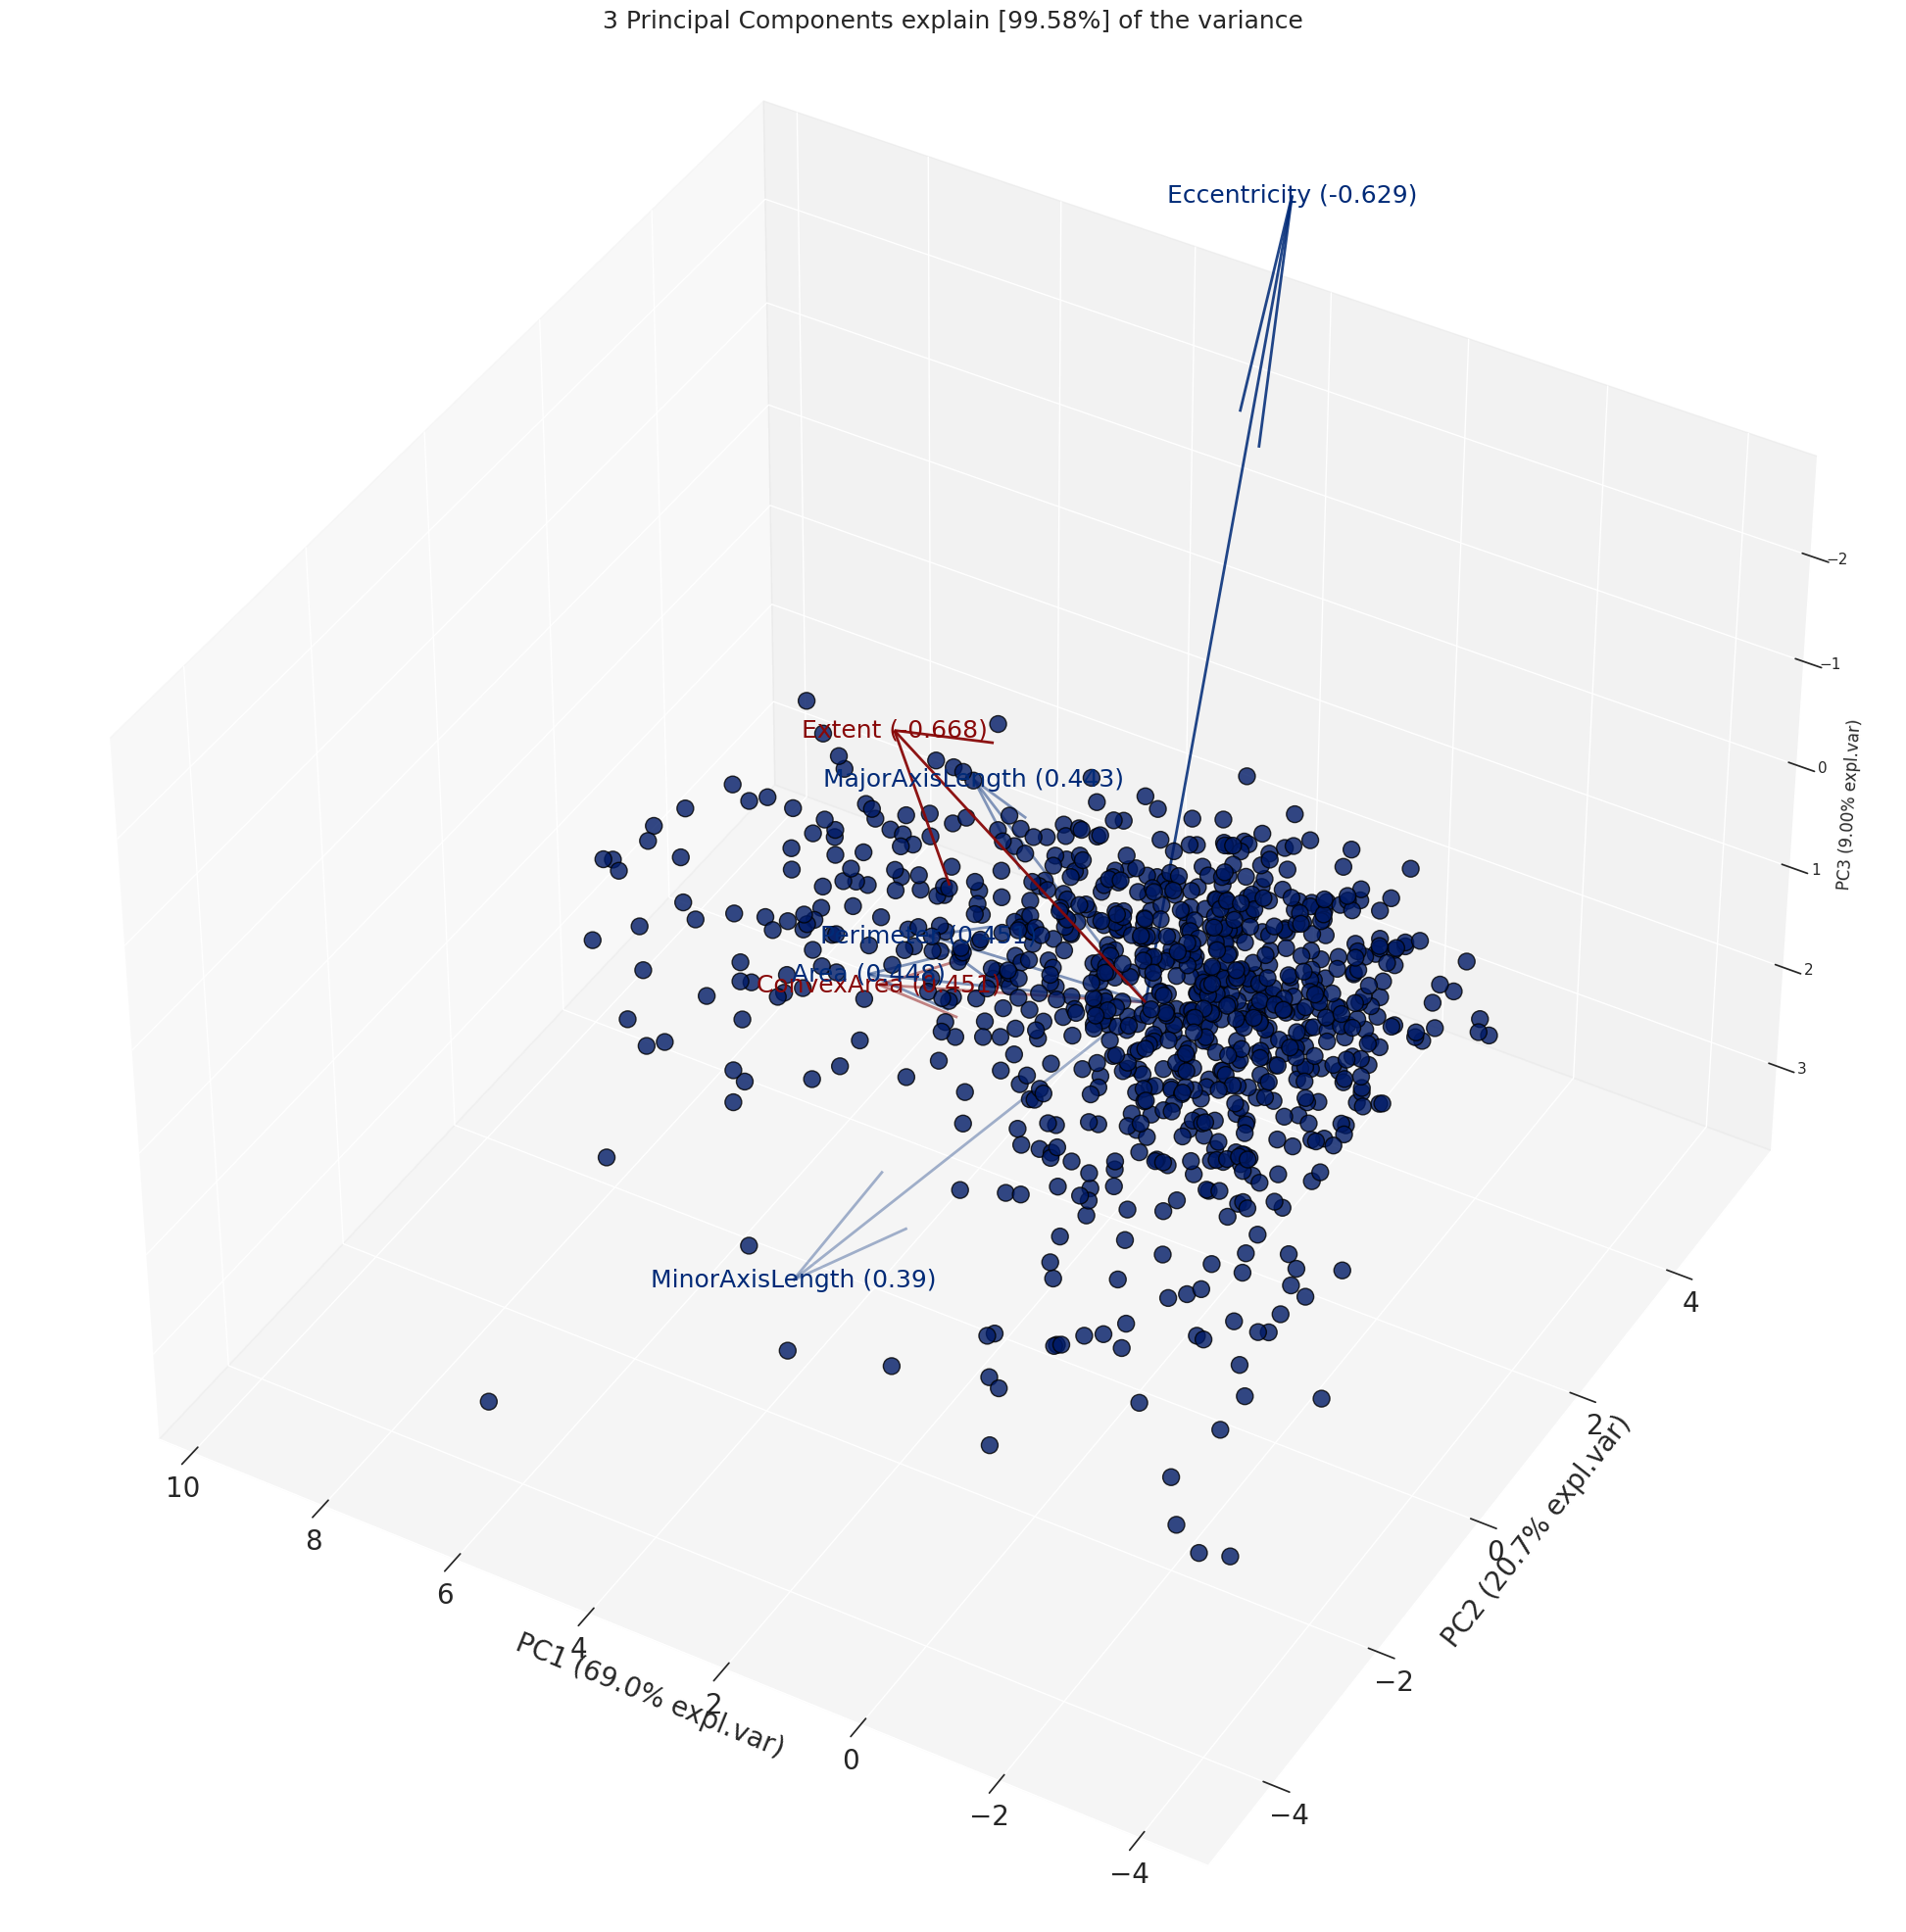

(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)', zlabel='PC3 (9.00% expl.var)'>)

In [ ]:
model.biplot3d(legend=False)

**Classification using Pycaret**

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (809, 8)
Unseen Data For Predictions: (90, 8)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

**Comparing all Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Logistic Regression**

In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the mofdel**

In [ ]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_lr

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

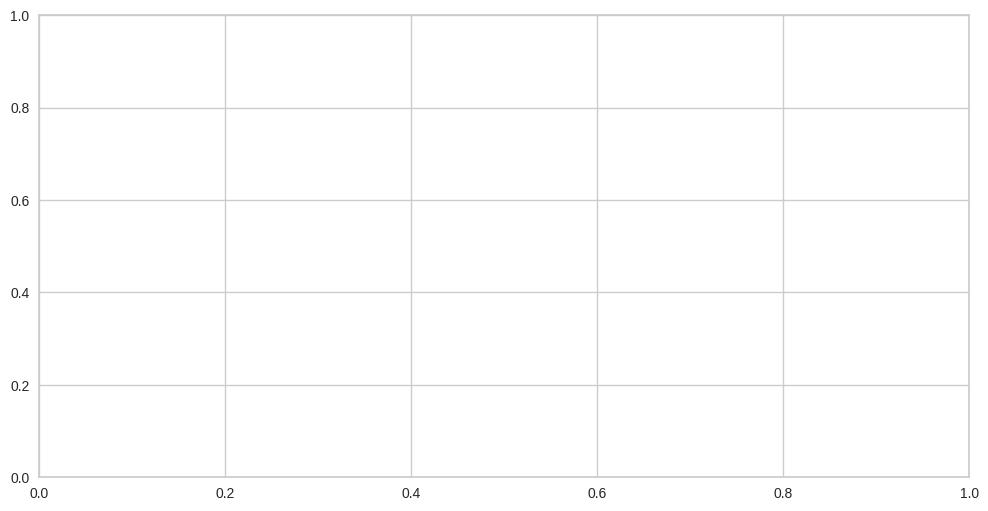

In [ ]:
evaluate_model(tuned_lr)

**Create model with Ridge Analysis**

In [ ]:
ridge=create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Ridge model**

In [ ]:
tuned_ridge=tune_model(ridge)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Ridge Model**

In [ ]:
tuned_ridge

RidgeClassifier(alpha=5.62, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

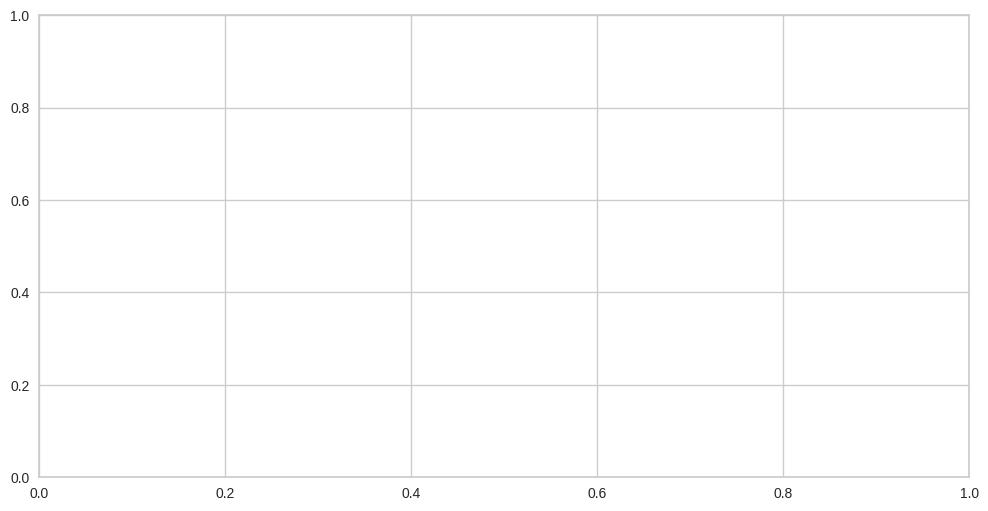

In [ ]:
evaluate_model(tuned_ridge)

**Create model with Linear Discriminant Analysis**

In [ ]:
lda=create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune LDA Model**

In [ ]:
tuned_lda=tune_model(lda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate LDA Model**

In [ ]:
tuned_lda

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage='auto', solver='lsqr',
                           store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

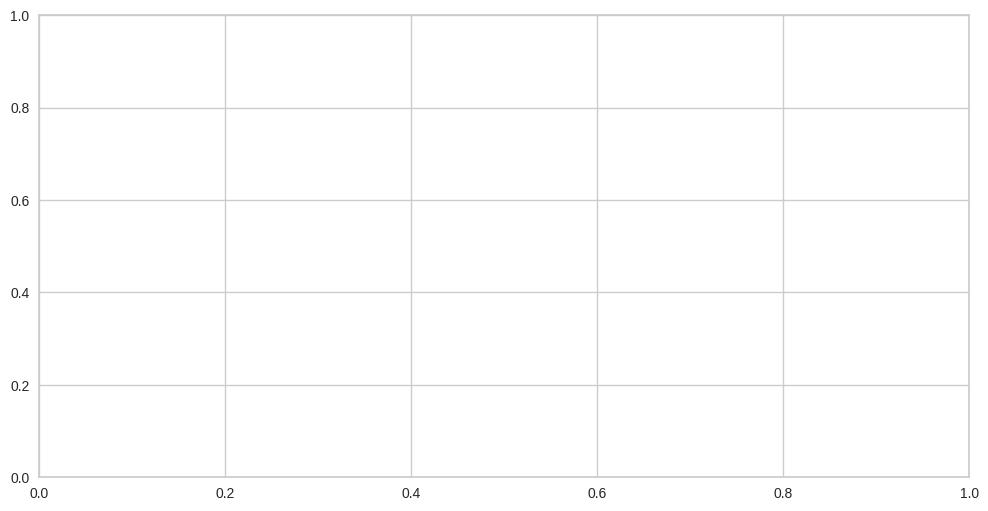

In [ ]:
evaluate_model(tuned_lda)

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

**Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Best model with PCA**

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Best Model**


In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Best Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

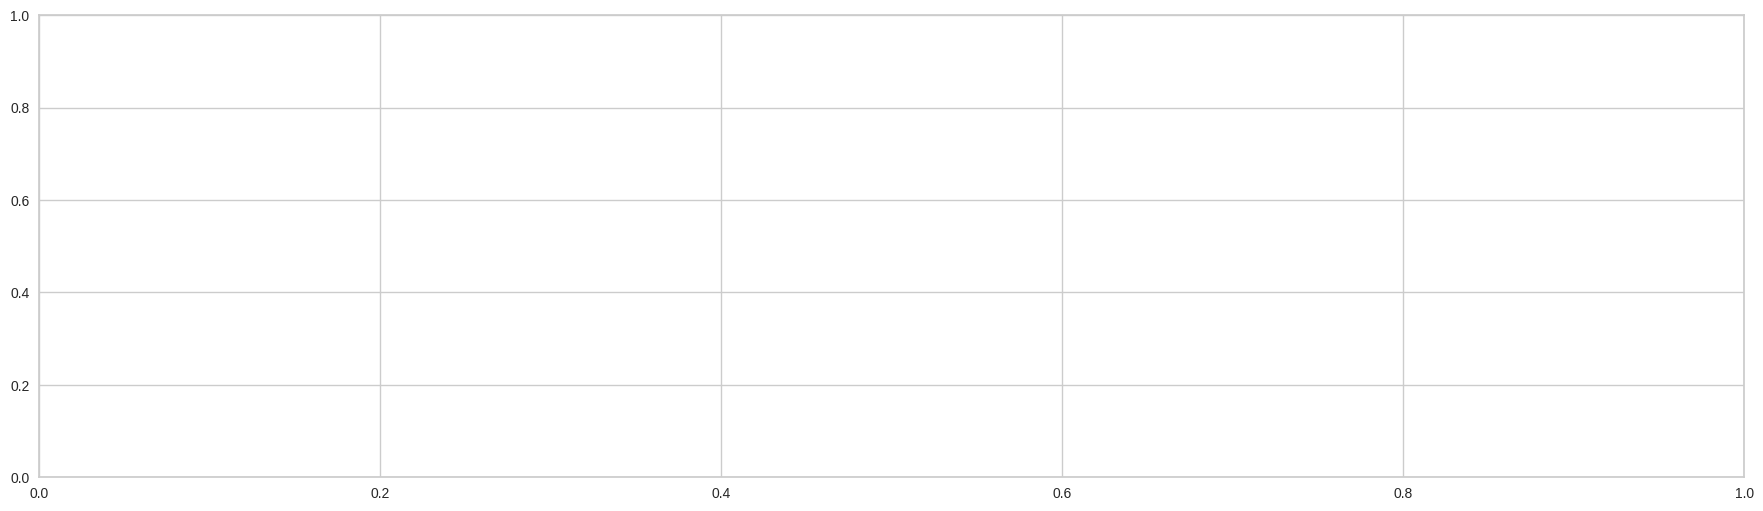

In [ ]:
evaluate_model(tuned_best_model_pca)

In [ ]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model**

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Model**

In [ ]:
tuned_lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

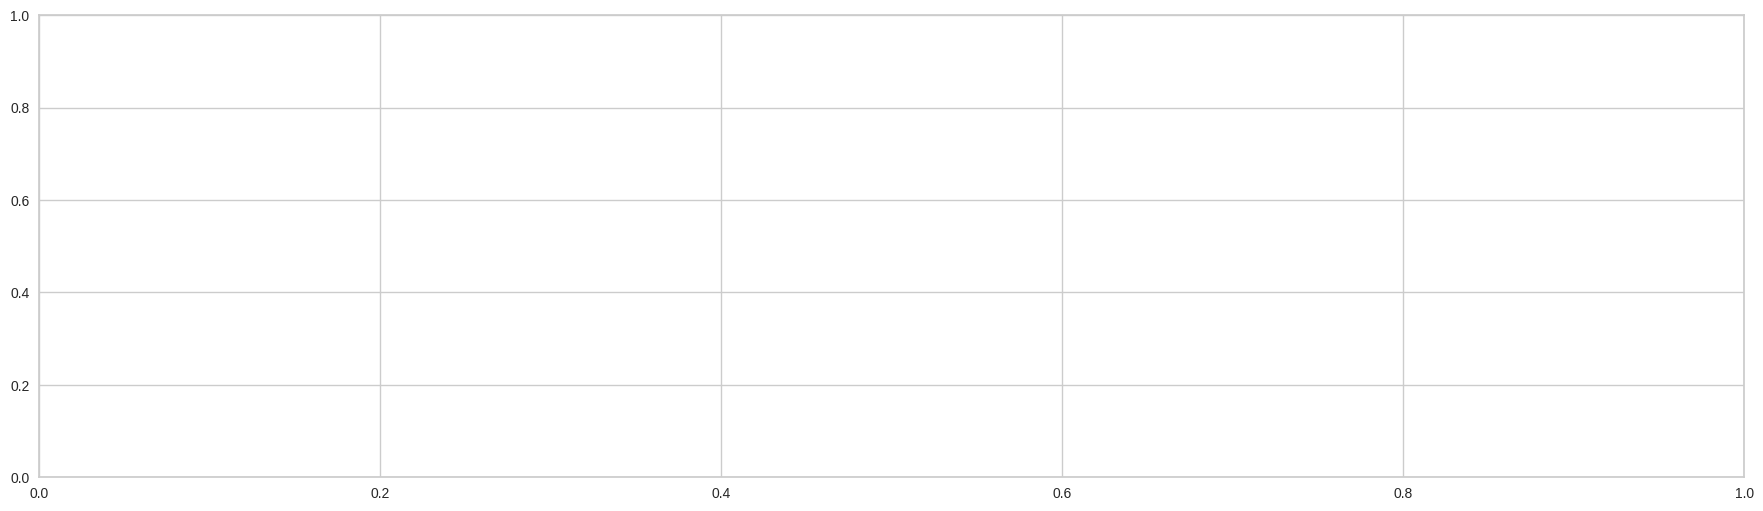

In [ ]:
evaluate_model(tuned_lr_pca)

**Create linear discriminant Analysis Model**

In [ ]:
lda_pca = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model**

In [ ]:
tuned_lda_pca = tune_model(lda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Model**

In [ ]:
tuned_lda_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

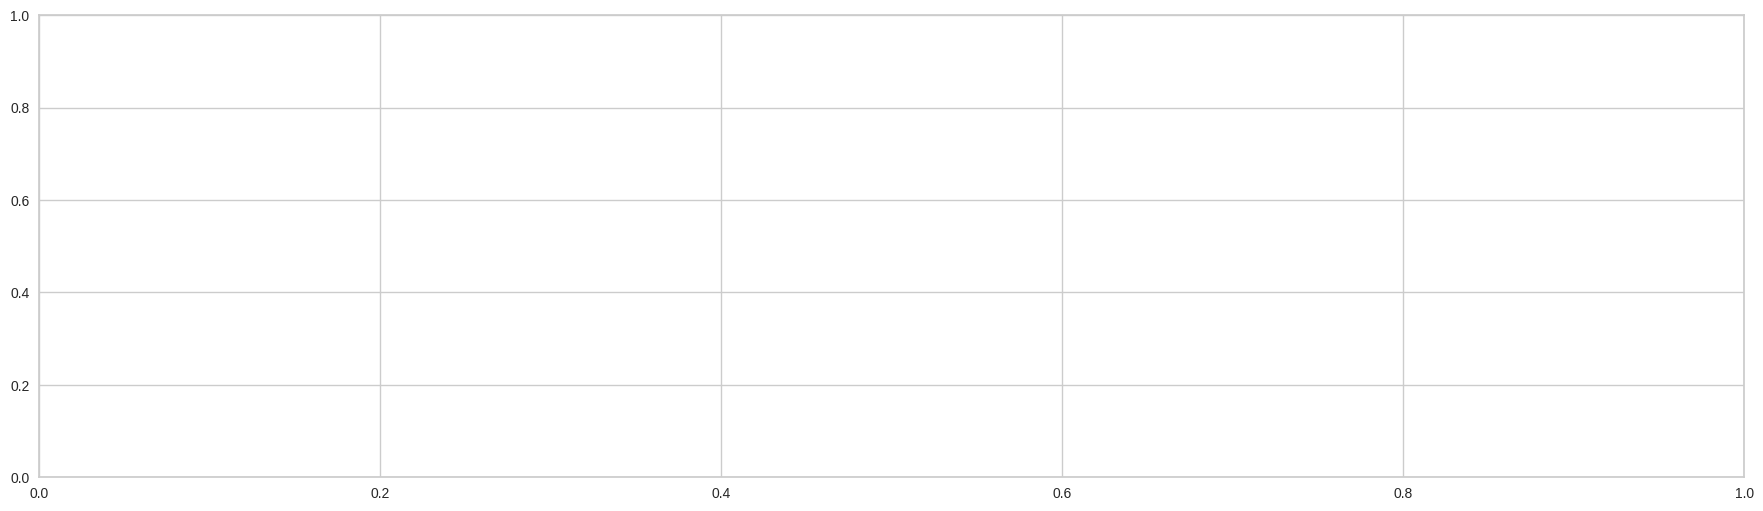

In [ ]:
evaluate_model(tuned_lda_pca)

**Explainable AI with Shapley values**

In [ ]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_samples_leaf=5, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

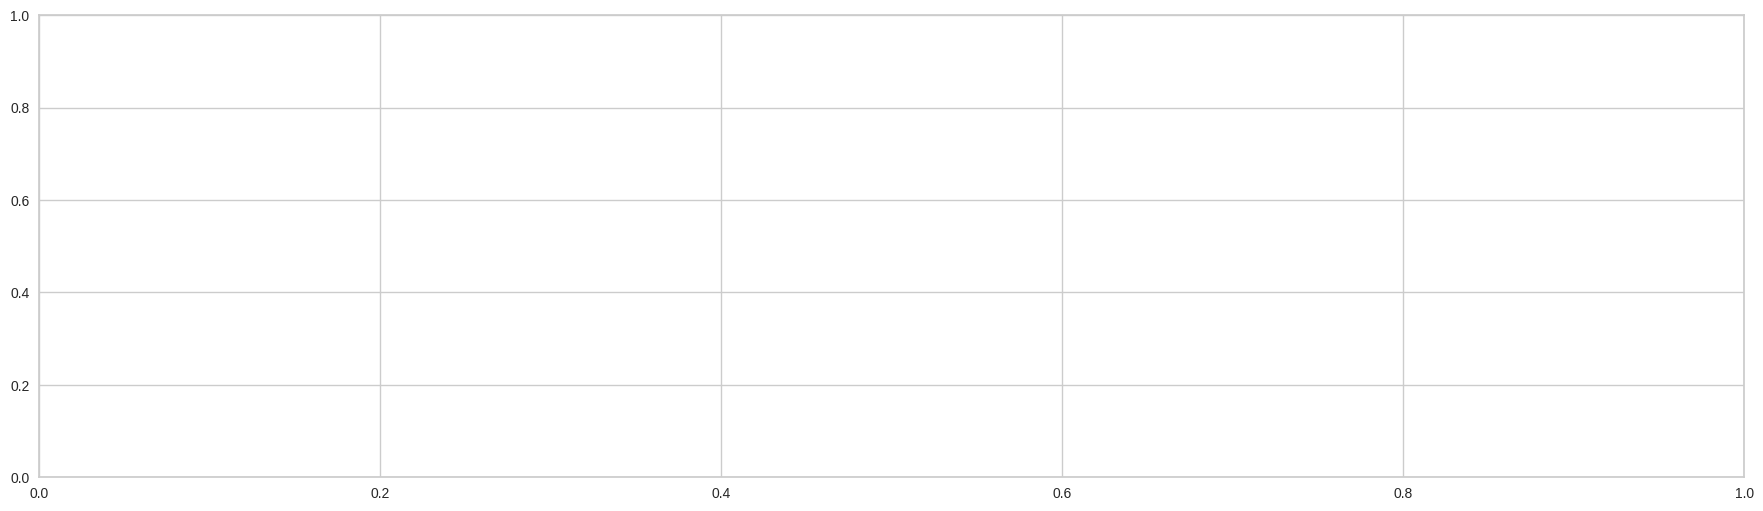

In [ ]:
evaluate_model(tuned_et_pca)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

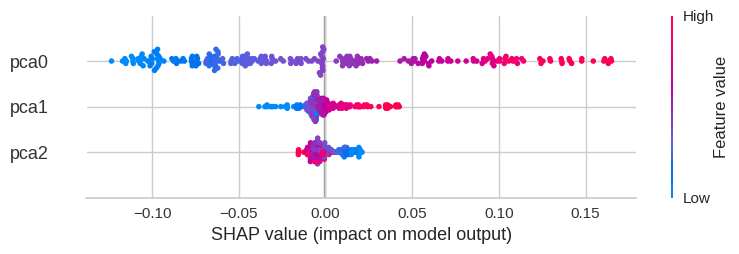

In [ ]:
interpret_model(tuned_et_pca, plot='summary')


In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_et_pca, plot='reason')